# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [ ]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        
    def rank(self):
        return self.rank
    
    def suit(self):
        return self.suit
    
    def numerical_value(self):
        if self.rank == "Ace":
            return 1
        elif self.rank in ['Jack','Queen','King']:
            return 10
        else:
            return self.rank
    
    def shuffle_card(self):
        return self.suit == "ShuffleCard"

    def __str__(self):
        if self.shuffle_card():
            return "Shuffle Card"
        else:
            return str(self.rank) + " of " + self.suit

class Deck:
    def __init__(self, num_decks=1):
        self.num_decks = num_decks
        self.cards = self._generate_deck()
        self._plastic_card_position = random.randint(len(self.cards)//2, len(self.cards) - 10)
        self.cards.insert(self._plastic_card_position, Card("ShuffleCard",None))
        
    def _generate_deck(self):
        deck = [Card(suit, rank) for suit in Card.SUITS for rank in Card.RANKS] * self.num_decks
        return deck
    
    def shuffle(self):
        random.shuffle(self.cards)
    
    def draw_card(self):
        if len(self.cards) > 0:
            return self.cards.pop()
        else:
            for _ in range(self.num_decks):
                self.cards.extend(self._generate_deck())
            self.shuffle()
            return self.cards.pop()
    
deck = Deck()
deck.shuffle()
print(deck.draw_card())  # Draws a card
print(deck.draw_card())  # Draws another card
for i in range(52):
    if i <= 56:
        print(deck.draw_card())

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:
class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        pass
        
    def rank(self):
        pass
    
    def suit(self):
        pass
    
    def numerical_value(self):
        pass
    
    def shuffle_card(self):
        pass

    def __str__(self):
        pass

class Deck:
    def __init__(self, num_decks=1):
        pass
    
    def _generate_deck(self):
        pass
    
    def shuffle(self):
        pass
    
    def draw_card(self):
        pass
    
class Hand:
        
    def __init__(self):
        pass
    
    def add_card(self,card):
        pass
    
    def calculate(self):
        pass
    
class Players:
    
    def __init__(self, name, balance):
        pass
    
    def name(self):
        pass
    
    def balance(self):
        pass
    
    def bet(self, amount):
        pass
    
    def deduct(self, value = 2):
        pass
    
    def play_hand(self, down_card, up_card, seen_cards):
        pass
        
    def __str__(self):
        pass
    
class Dealer(Players):
    def __init__(self, threshold = 16):
        pass
    
    def play_hand(self, down_card, up_card, seen_cards):
        pass
    
class Player1(Players):
    def play_hand(self, down_card, up_cards, seen_cards):
        pass

class other_players(Players):
    def play_hand(self, down_card, up_cards, seen_cards):
        pass
    
class Game:
    def __init__(self, num_decks = 6):
        pass
    
    def players(self):
        pass
    
    def add_players(self):
        pass
    
    def all_players(self):
        pass
    
    def deal_and_check_shuffle(self, deck):
        pass
    
    def show_status(self, hands, seen_cards):
        pass
    
    def play_game(self,num_hands):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [ ]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        self._suit = suit
        self._rank = rank
        
    def rank(self):
        return self._rank
    
    def suit(self):
        return self._suit
    
    def numerical_value(self):
        if self._rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self._rank == 'Ace':
            return 11
        else:
            return int(self._rank)
    
    def __str__(self):
        return f"{self._rank} of {self._suit}"

class Deck:
    def __init__(self, num_decks=1):
        self._num_decks = num_decks
        self._cards = []
        self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        self._cards = [Card(suit, rank) for suit in Card.SUITS for rank in Card.RANKS] * self._num_decks
    
    def shuffle(self):
        random.shuffle(self._cards)
    
    def draw_card(self):
        if not self._cards:
            self._generate_deck()
            self.shuffle()
        return self._cards.pop()

class Hand:
    def __init__(self):
        self._cards = []
    
    def add_card(self, card):
        self._cards.append(card)
    
    def calculate(self):
        total = sum(card.numerical_value() for card in self._cards)
        num_aces = sum(1 for card in self._cards if card.rank() == 'Ace')
        
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        
        return total
    
    def __str__(self):
        return ', '.join(str(card) for card in self._cards)

class Players:
    def __init__(self, name, balance):
        self._name = name
        self._balance = balance
        self._hand = Hand()
    
    def name(self):
        return self._name
    
    def balance(self):
        return self._balance
    
    def bet(self):
        while True:
            try:
                amount = input(f"{self._name}, enter your bet amount (or type 'quit' to exit): ")
                if amount.lower() == 'quit':
                    return None
                amount = float(amount)
                if amount > self._balance:
                    print("Insufficient funds! Try again.")
                elif self._balance == 0:
                    print(f"{self.name} has left the game.")
                else:
                    self._balance -= amount
                    return amount
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    def deduct(self, value):
        self._balance += value
    
    def play_hand(self, deck):
        while True:
            if self._hand.calculate() > 21:
                print(f"{self._name} busts!")
                break
            choice = input("Hit or Stand? (h/s): ").lower()
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
                print(f"{self._name}'s new hand: {self._hand} (Total: {self._hand.calculate()})")
            elif choice == 's':
                break
    
    def __str__(self):
        return f"{self._name} with balance: {self._balance}"

class Dealer(Players):
    def __init__(self, threshold=16):
        super().__init__("Dealer", balance=float('inf'))
        self._threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self._threshold:
            self._hand.add_card(deck.draw_card())
        if self._hand.calculate() > 21:
            print("Dealer busts!")

class Game:
    def __init__(self, num_decks=6):
        self._deck = Deck(num_decks)
        self._dealer = Dealer()
        self._players = []
        self._round_counter = 0
        self._player_num = 0
    
    def add_players(self):
        while True:
            self._player_num = input("Enter number of players or quit: ")
            if self._player_num.lower() == 'quit':
                return
            try:
                self._player_num = int(self._player_num)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        
        for i in range(self._player_num):
            name = input(f"Enter name for Player {i+1}: ")
            while True:
                balance = input(f"Enter starting balance for {name}: ")
                try:
                    balance = float(balance)
                    break
                except ValueError:
                    print("Invalid input. Please enter a number")
            self._players.append(Players(name, balance))
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self._players:
                player._hand.add_card(self._deck.draw_card())
            self._dealer._hand.add_card(self._deck.draw_card())
    
    def show_status(self):
        for player in self._players:
            print(f"{player.name()} has: {player._hand} (Total: {player._hand.calculate()})")
        print(f"Dealer shows: {self._dealer._hand._cards[0]}")
    
    def play_game(self, num_hands):
        for round_number in range(1, num_hands + 1):
            self._round_counter += 1
            bets = {}
            
            players_to_remove = []
            for player in self._players:
                bet = player.bet()
                if bet is None:
                    print(f"{player.name()} is leaving the game.")
                    players_to_remove.append(player)  
                else:
                    bets[player] = bet
            
            for player in players_to_remove:
                self._players.remove(player)

            if not self._players:  
                print("No players remaining. Game over.")
                return
            
            self.deal_initial_cards()
            self.show_status()
            
            print(f"\n=== Round {round_number} ===\n")
            
            for player in self._players:
                player.play_hand(self._deck)
            
            self._dealer.play_hand(self._deck)
            self.determine_winner(bets)
            
            print("\n=== Player Balances After Round ===")
            for player in self._players:
                print(f"{player.name()}: {player.balance()} chips")
            print("===============================\n")
            
            if self._player_num < 4 and self._round_counter % 1 == 0:
                self.ask_for_new_players()
    
    def determine_winner(self, bets):
        dealer_score = self._dealer._hand.calculate()
        print(f"\nDealer's final hand: {self._dealer._hand} (Total: {dealer_score})")
        
        for player in self._players:
            player_score = player._hand.calculate()
            print(f"{player.name()}'s final hand: {player._hand} (Total: {player_score})")
            
            if player_score > 21:
                print(f"{player.name()} busts and loses the bet.")
            elif dealer_score > 21 or player_score > dealer_score:
                print(f"{player.name()} wins!")
                player.deduct(bets[player] * 2)
            elif player_score == dealer_score:
                print(f"{player.name()} pushes (tie).")
                player.deduct(bets[player])
            else:
                print(f"{player.name()} loses.")
            player._hand = Hand()
        self._dealer._hand = Hand()
        
    def ask_for_new_players(self):
        while True:
            response = input("Would you like to add another player to the game? (yes/no): ").lower()
            if response == "yes":
                self.add_new_player()
                break
            elif response == "no":
                break
            else:
                print("Invalid input, please answer 'yes' or 'no'.")
                
    def add_new_player(self):
        name = input(f"Enter name for Player {self._player_num + 1}: ")
        while True:
            balance = input(f"Enter starting balance for {name}: ")
            try:
                balance = float(balance)
                break
            except ValueError:
                print("Invalid input. Please enter a number")
        
        self._players.append(Players(name, balance))
        self._player_num += 1

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [ ]:
if __name__ == "__main__":
    game = Game()
    game.add_players()
    game.play_game(10)

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [7]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        self._suit = suit
        self._rank = rank
        
    def rank(self):
        return self._rank
    
    def suit(self):
        return self._suit
    
    def numerical_value(self):
        if self._rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self._rank == 'Ace':
            return 11
        else:
            return int(self._rank)
    
    def __str__(self):
        return f"{self._rank} of {self._suit}"

class Deck:
    def __init__(self, num_decks=1):
        self._num_decks = num_decks
        self._cards = []
        self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        self._cards = [Card(suit, rank) for suit in Card.SUITS for rank in Card.RANKS] * self._num_decks
    
    def shuffle(self):
        random.shuffle(self._cards)
    
    def draw_card(self):
        if not self._cards:
            self._generate_deck()
            self.shuffle()
        return self._cards.pop()

class Hand:
    def __init__(self):
        self._cards = []
    
    def add_card(self, card):
        self._cards.append(card)
    
    def calculate(self):
        total = sum(card.numerical_value() for card in self._cards)
        num_aces = sum(1 for card in self._cards if card.rank() == 'Ace')
        
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        
        return total
    
    def __str__(self):
        return ', '.join(str(card) for card in self._cards)

class Players:
    def __init__(self, name, balance):
        self._name = name
        self._balance = balance
        self._hand = Hand()
    
    def name(self):
        return self._name
    
    def balance(self):
        return self._balance
    
    def bet(self):
        while True:
            try:
                amount = input(f"{self._name}, enter your bet amount (or type 'quit' to exit): ")
                if amount.lower() == 'quit':
                    return None
                amount = float(amount)
                if amount > self._balance:
                    print("Insufficient funds! Try again.")
                elif self._balance == 0:
                    print(f"{self.name} has left the game.")
                else:
                    self._balance -= amount
                    return amount
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    def deduct(self, value):
        self._balance += value
    
    def play_hand(self, deck):
        while True:
            if self._hand.calculate() > 21:
                print(f"{self._name} busts!")
                break
            choice = input("Hit or Stand? (h/s): ").lower()
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
                print(f"{self._name}'s new hand: {self._hand} (Total: {self._hand.calculate()})")
            elif choice == 's':
                break
    
    def __str__(self):
        return f"{self._name} with balance: {self._balance}"

class Dealer(Players):
    def __init__(self, threshold=16):
        super().__init__("Dealer", balance=float('inf'))
        self._threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self._threshold:
            self._hand.add_card(deck.draw_card())
        if self._hand.calculate() > 21:
            print("Dealer busts!")

class Game:
    def __init__(self, num_decks=6):
        self._deck = Deck(num_decks)
        self._dealer = Dealer()
        self._players = []
        self._round_counter = 0
        self._player_num = 0
    
    def add_players(self):
        while True:
            self._player_num = input("Enter number of players or quit: ")
            if self._player_num.lower() == 'quit':
                return
            try:
                self._player_num = int(self._player_num)
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        
        for i in range(self._player_num):
            name = input(f"Enter name for Player {i+1}: ")
            while True:
                balance = input(f"Enter starting balance for {name}: ")
                try:
                    balance = float(balance)
                    break
                except ValueError:
                    print("Invalid input. Please enter a number")
            self._players.append(Players(name, balance))
    
    def deal_initial_cards(self):
        for _ in range(2):
            for player in self._players:
                player._hand.add_card(self._deck.draw_card())
            self._dealer._hand.add_card(self._deck.draw_card())
    
    def show_status(self):
        for player in self._players:
            print(f"{player.name()} has: {player._hand} (Total: {player._hand.calculate()})")
        print(f"Dealer shows: {self._dealer._hand._cards[0]}")
    
    def play_game(self, num_hands):
        for round_number in range(1, num_hands + 1):
            self._round_counter += 1
            bets = {}
            
            players_to_remove = []
            for player in self._players:
                bet = player.bet()
                if bet is None:
                    print(f"{player.name()} is leaving the game.")
                    players_to_remove.append(player)  
                else:
                    bets[player] = bet
            
            for player in players_to_remove:
                self._players.remove(player)

            if not self._players:  
                print("No players remaining. Game over.")
                return
            
            self.deal_initial_cards()
            self.show_status()
            
            print(f"\n=== Round {round_number} ===\n")
            
            for player in self._players:
                player.play_hand(self._deck)
            
            self._dealer.play_hand(self._deck)
            self.determine_winner(bets)
            
            print("\n=== Player Balances After Round ===")
            for player in self._players:
                print(f"{player.name()}: {player.balance()} chips")
            print("===============================\n")
    
    def determine_winner(self, bets):
        dealer_score = self._dealer._hand.calculate()
        print(f"\nDealer's final hand: {self._dealer._hand} (Total: {dealer_score})")
        
        for player in self._players:
            player_score = player._hand.calculate()
            print(f"{player.name()}'s final hand: {player._hand} (Total: {player_score})")
            
            if player_score > 21:
                print(f"{player.name()} busts and loses the bet.")
            elif dealer_score > 21 or player_score > dealer_score:
                print(f"{player.name()} wins!")
                player.deduct(bets[player] * 2)
            elif player_score == dealer_score:
                print(f"{player.name()} pushes (tie).")
                player.deduct(bets[player])
            else:
                print(f"{player.name()} loses.")
            player._hand = Hand()
        self._dealer._hand = Hand()


In [8]:
class Strategic_Player(Players):
    def __init__(self, name, balance):
        super().__init__(name, balance)
        self._card_value_sum = 0
    
    def calculate_card_value_sum(self):
        self._card_value_sum = 0
        
        for card in self._hand._cards:
            rank = card.rank()
            if rank in ['2', '3', '4', '5', '6']:
                self._card_value_sum += 1  
            elif rank in ['7', '8', '9']:
                self._card_value_sum += 0  
            else:
                self._card_value_sum -= 1  
    
    def play_hand(self, deck):
        while True:
            self.calculate_card_value_sum()
            print(f"{self.name()}'s card value sum: {self._card_value_sum}")
            
            if self._hand.calculate() > 21:
                print(f"{self.name()} busts!")
                break
                
            if self._hand.calculate() == 21:
                break
            
            if self._card_value_sum < 0: 
                choice = 'h'
            else:  
                choice = 's'
            
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
                print(f"{self.name()}'s new hand: {self._hand} (Total: {self._hand.calculate()})")
            elif choice == 's':
                break



7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [10]:
class Dealer_Strategy(Players):
    def __init__(self, name, balance, threshold = 16):
        super().__init__(name, balance)
        self.threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self.threshold:
            self._hand.add_card(deck.draw_card())
            
            if self._hand.calculate() > 21:
                print(f"{self.name()} busts!")
                break
                
            if self._hand.calculate() == 21:
                break
                
            if self._hand.calculate() <= 16:
                choice = 'h'
            else:
                choice = 's'
                
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
            else:
                break
                
if __name__ == "__main__":
    game = Game()
    strategic_player = Strategic_Player("Strategic_Player1", 1000)
    dealer_strat1 = Dealer_Strategy("Dealer_Strat_Player1", 1000)
    dealer_strat2 = Dealer_Strategy("Dealer_Strat_Player2", 1000)
    game._players.append(strategic_player)
    game._players.append(dealer_strat1)
    game._players.append(dealer_strat2)
    game.play_game(50)

Strategic_Player1, enter your bet amount (or type 'quit' to exit): 10
Dealer_Strat_Player1, enter your bet amount (or type 'quit' to exit): 10
Dealer_Strat_Player2, enter your bet amount (or type 'quit' to exit): 10
Strategic_Player1 has: 8 of Hearts, Ace of Diamonds (Total: 19)
Dealer_Strat_Player1 has: 5 of Clubs, 5 of Clubs (Total: 10)
Dealer_Strat_Player2 has: Ace of Diamonds, Ace of Diamonds (Total: 12)
Dealer shows: 9 of Hearts

=== Round 1 ===

Strategic_Player1's card value sum: -1
Strategic_Player1's new hand: 8 of Hearts, Ace of Diamonds, 10 of Clubs (Total: 19)
Strategic_Player1's card value sum: -2
Strategic_Player1's new hand: 8 of Hearts, Ace of Diamonds, 10 of Clubs, 4 of Clubs (Total: 23)
Strategic_Player1's card value sum: -1
Strategic_Player1 busts!

Dealer's final hand: 9 of Hearts, 8 of Clubs (Total: 17)
Strategic_Player1's final hand: 8 of Hearts, Ace of Diamonds, 10 of Clubs, 4 of Clubs (Total: 23)
Strategic_Player1 busts and loses the bet.
Dealer_Strat_Player1's 

KeyboardInterrupt: Interrupted by user

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [6]:
import random

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        self._suit = suit
        self._rank = rank
        
    def rank(self):
        return self._rank
    
    def suit(self):
        return self._suit
    
    def numerical_value(self):
        if self._rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self._rank == 'Ace':
            return 11
        else:
            return int(self._rank)
    
    def __str__(self):
        return f"{self._rank} of {self._suit}"

class Deck:
    def __init__(self, num_decks=1):
        self._num_decks = num_decks
        self._cards = []
        self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        self._cards = [Card(suit, rank) for suit in Card.SUITS for rank in Card.RANKS] * self._num_decks
    
    def shuffle(self):
        random.shuffle(self._cards)
    
    def draw_card(self):
        if not self._cards:
            self._generate_deck()
            self.shuffle()
        return self._cards.pop()

class Hand:
    def __init__(self):
        self._cards = []
    
    def add_card(self, card):
        self._cards.append(card)
    
    def calculate(self):
        total = sum(card.numerical_value() for card in self._cards)
        num_aces = sum(1 for card in self._cards if card.rank() == 'Ace')
        
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        
        return total
    
    def __str__(self):
        return ', '.join(str(card) for card in self._cards)

class Players:
    def __init__(self, name, balance):
        self._name = name
        self._balance = balance
        self._hand = Hand()
    
    def name(self):
        return self._name
    
    def balance(self):
        return self._balance
    
    def bet(self):
        while True:
            try:
                amount = input(f"{self._name}, enter your bet amount (or type 'quit' to exit): ")
                if amount.lower() == 'quit':
                    return None
                amount = float(amount)
                if amount > self._balance:
                    print("Insufficient funds! Try again.")
                elif self._balance == 0:
                    print(f"{self.name} has left the game.")
                else:
                    self._balance -= amount
                    return amount
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    def deduct(self, value):
        self._balance += value
    
    def play_hand(self, deck):
        while True:
            if self._hand.calculate() > 21:
                break
            if choice == 'h':
                self._hand.add_card(deck.draw_card())

            elif choice == 's':
                break
    
    def __str__(self):
        return f"{self._name} with balance: {self._balance}"

class Dealer(Players):
    def __init__(self, threshold=16):
        super().__init__("Dealer", balance=float('inf'))
        self._threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self._threshold:
            self._hand.add_card(deck.draw_card())
        if self._hand.calculate() > 21:
            return
        
class Dealer_Strategy(Players):
    def __init__(self, name, balance, threshold = 16):
        super().__init__(name, balance)
        self.threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self.threshold:
            self._hand.add_card(deck.draw_card())
            
            if self._hand.calculate() > 21:
                break
                
            if self._hand.calculate() == 21:
                break
                
            if self._hand.calculate() <= 16:
                choice = 'h'
            else:
                choice = 's'
                
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
            else:
                break
                
class Strategic_Player(Players):
    def __init__(self, name, balance):
        super().__init__(name, balance)
        self._card_value_sum = 0
    
    def calculate_card_value_sum(self):
        self._card_value_sum = 0
        
        for card in self._hand._cards:
            rank = card.rank()
            if rank in ['2', '3', '4', '5', '6']:
                self._card_value_sum += 1  
            elif rank in ['7', '8', '9']:
                self._card_value_sum += 0  
            else:
                self._card_value_sum -= 1  
    
    def play_hand(self, deck):
        while True:
            self.calculate_card_value_sum()

            if self._hand.calculate() > 21:
                break

            if self._hand.calculate() == 21:
                break

            if self._card_value_sum < 0: 
                choice = 'h'
            else:  
                choice = 's'

            if choice == 'h':
                self._hand.add_card(deck.draw_card())
            elif choice == 's':
                break

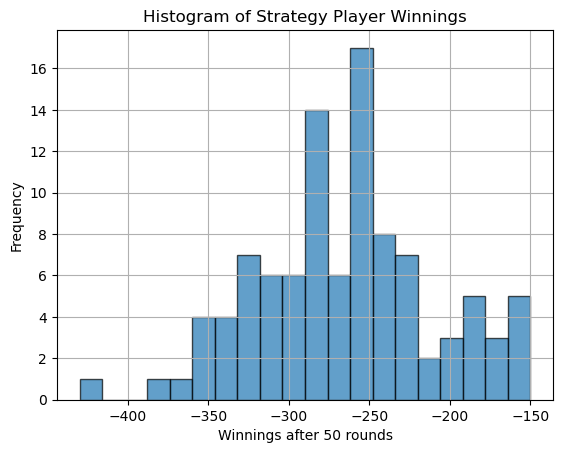

Average winnings per round: -5.32
Standard deviation of winnings: 55.84
Probability of net winnings after 50 rounds: 0.00%
Probability of net loss after 50 rounds: 100.00%


In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Simulation:
    def __init__(self, num_games=100, rounds_per_game=50, starting_balance=1000, bet_amount=10):
        self.num_games = num_games
        self.rounds_per_game = rounds_per_game
        self.starting_balance = starting_balance
        self.bet_amount = bet_amount
        self.winnings = []

    def run(self):
        for _ in range(self.num_games):
            player = Strategic_Player(name="Player", balance=self.starting_balance)

            for _ in range(self.rounds_per_game):
                deck = Deck()
                player._hand = Hand()  # Reset player hand
                dealer = Dealer()  # Dealer instance
                dealer._hand = Hand()  # Reset dealer hand

                # Draw initial cards
                player._hand.add_card(deck.draw_card())
                player._hand.add_card(deck.draw_card())

                dealer._hand.add_card(deck.draw_card())
                dealer._hand.add_card(deck.draw_card())

                # Player plays
                player.play_hand(deck)

                # Dealer plays
                dealer.play_hand(deck)

                player_total = player._hand.calculate()
                dealer_total = dealer._hand.calculate()

                # Determine winner
                if player_total > 21:  # Player busts
                    player.deduct(-self.bet_amount)  # Lose bet
                elif dealer_total > 21 or player_total > dealer_total:  # Dealer busts or player has higher hand
                    player.deduct(self.bet_amount)  # Win bet
                elif player_total < dealer_total:  # Dealer wins
                    player.deduct(-self.bet_amount)  # Lose bet
                else:  # Tie (push)
                    pass  # No money won or lost

            # Store net winnings
            self.winnings.append(player.balance() - self.starting_balance)

    def plot_histogram(self):
        plt.hist(self.winnings, bins=20, edgecolor='black', alpha=0.7)
        plt.xlabel("Winnings after 50 rounds")
        plt.ylabel("Frequency")
        plt.title("Histogram of Strategy Player Winnings")
        plt.grid(True)
        plt.show()

    def compute_statistics(self):
        avg_winnings_per_round = np.mean(self.winnings) / self.rounds_per_game
        std_dev = np.std(self.winnings)
        prob_win = np.mean(np.array(self.winnings) > 0)
        prob_loss = np.mean(np.array(self.winnings) < 0)

        print(f"Average winnings per round: {avg_winnings_per_round:.2f}")
        print(f"Standard deviation of winnings: {std_dev:.2f}")
        print(f"Probability of net winnings after 50 rounds: {prob_win:.2%}")
        print(f"Probability of net loss after 50 rounds: {prob_loss:.2%}")

# Running the simulation
sim = Simulation()
sim.run()
sim.plot_histogram()
sim.compute_statistics()

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

Running simulation with dealer threshold 14...
Running simulation with dealer threshold 15...
Running simulation with dealer threshold 16...
Running simulation with dealer threshold 17...
Running simulation with dealer threshold 18...


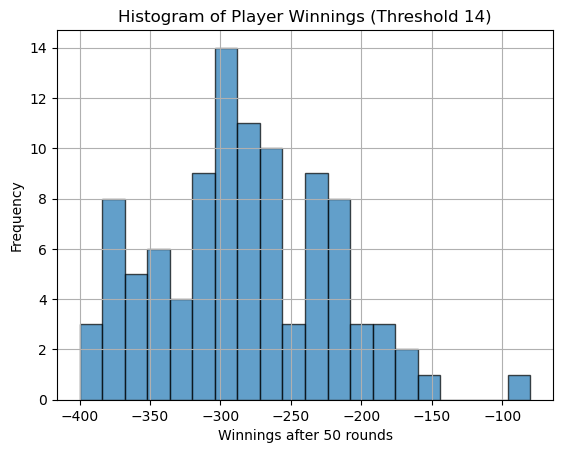

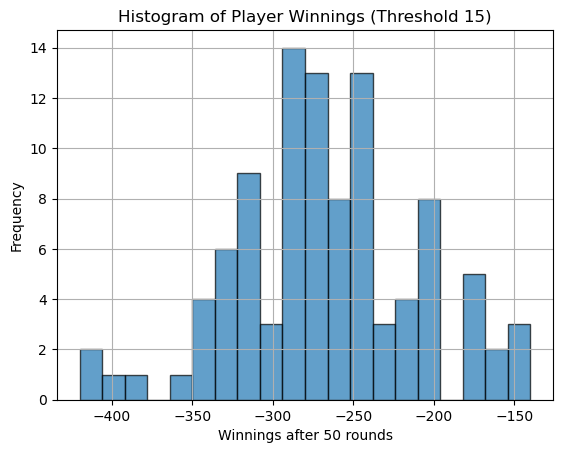

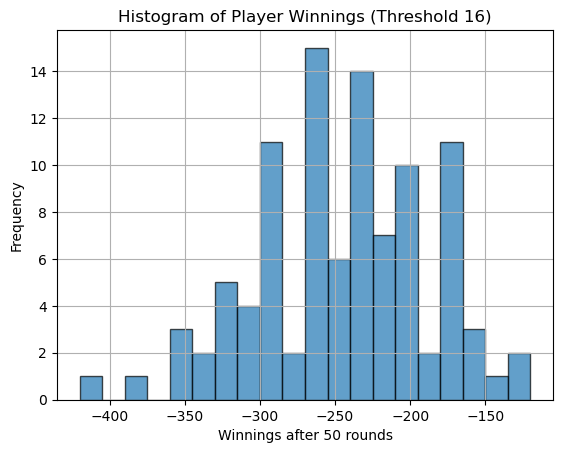

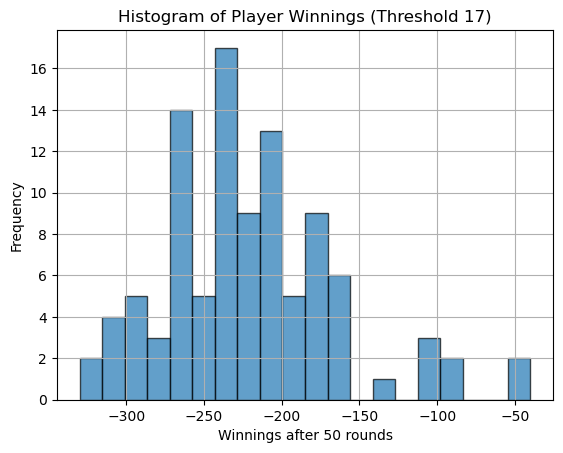

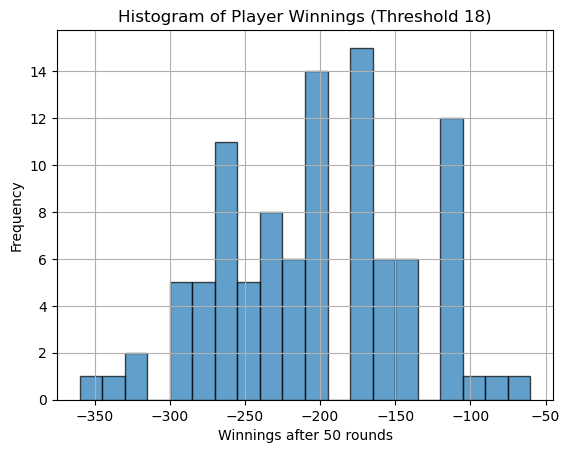

{14: {'avg_winnings_per_round': -5.694,
  'std_dev': 61.3099502527934,
  'prob_win': 0.0,
  'prob_loss': 1.0},
 15: {'avg_winnings_per_round': -5.37,
  'std_dev': 56.73402858955109,
  'prob_win': 0.0,
  'prob_loss': 1.0},
 16: {'avg_winnings_per_round': -4.936,
  'std_dev': 57.54789309783634,
  'prob_win': 0.0,
  'prob_loss': 1.0},
 17: {'avg_winnings_per_round': -4.406000000000001,
  'std_dev': 55.954535115573975,
  'prob_win': 0.0,
  'prob_loss': 1.0},
 18: {'avg_winnings_per_round': -4.1080000000000005,
  'std_dev': 62.312438565666795,
  'prob_win': 0.0,
  'prob_loss': 1.0}}

In [14]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Card:
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
    RANKS = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']
    
    def __init__(self, suit, rank):
        self._suit = suit
        self._rank = rank
        
    def rank(self):
        return self._rank
    
    def suit(self):
        return self._suit
    
    def numerical_value(self):
        if self._rank in ['Jack', 'Queen', 'King']:
            return 10
        elif self._rank == 'Ace':
            return 11
        else:
            return int(self._rank)
    
    def __str__(self):
        return f"{self._rank} of {self._suit}"

class Deck:
    def __init__(self, num_decks=1):
        self._num_decks = num_decks
        self._cards = []
        self._generate_deck()
        self.shuffle()
    
    def _generate_deck(self):
        self._cards = [Card(suit, rank) for suit in Card.SUITS for rank in Card.RANKS] * self._num_decks
    
    def shuffle(self):
        random.shuffle(self._cards)
    
    def draw_card(self):
        if not self._cards:
            self._generate_deck()
            self.shuffle()
        return self._cards.pop()

class Hand:
    def __init__(self):
        self._cards = []
    
    def add_card(self, card):
        self._cards.append(card)
    
    def calculate(self):
        total = sum(card.numerical_value() for card in self._cards)
        num_aces = sum(1 for card in self._cards if card.rank() == 'Ace')
        
        while total > 21 and num_aces:
            total -= 10
            num_aces -= 1
        
        return total
    
    def __str__(self):
        return ', '.join(str(card) for card in self._cards)

class Players:
    def __init__(self, name, balance):
        self._name = name
        self._balance = balance
        self._hand = Hand()
    
    def name(self):
        return self._name
    
    def balance(self):
        return self._balance
    
    def bet(self):
        while True:
            try:
                amount = input(f"{self._name}, enter your bet amount (or type 'quit' to exit): ")
                if amount.lower() == 'quit':
                    return None
                amount = float(amount)
                if amount > self._balance:
                    print("Insufficient funds! Try again.")
                elif self._balance == 0:
                    print(f"{self.name} has left the game.")
                else:
                    self._balance -= amount
                    return amount
            except ValueError:
                print("Invalid input. Please enter a number.")
    
    def deduct(self, value):
        self._balance += value
    
    def play_hand(self, deck):
        while True:
            if self._hand.calculate() > 21:
                break
            if choice == 'h':
                self._hand.add_card(deck.draw_card())

            elif choice == 's':
                break
    
    def __str__(self):
        return f"{self._name} with balance: {self._balance}"

class Dealer_Strategy(Players):
    def __init__(self, name, balance, threshold=16):
        super().__init__(name, balance)
        self.threshold = threshold
    
    def play_hand(self, deck):
        while self._hand.calculate() < self.threshold:
            self._hand.add_card(deck.draw_card())
            
            if self._hand.calculate() > 21:
                break
                
            if self._hand.calculate() == 21:
                break
                
            if self._hand.calculate() <= 16:
                choice = 'h'
            else:
                choice = 's'
                
            if choice == 'h':
                self._hand.add_card(deck.draw_card())
            else:
                break

class Strategic_Player(Players):
    def __init__(self, name, balance):
        super().__init__(name, balance)
        self._card_value_sum = 0
    
    def calculate_card_value_sum(self):
        self._card_value_sum = 0
        
        for card in self._hand._cards:
            rank = card.rank()
            if rank in ['2', '3', '4', '5', '6']:
                self._card_value_sum += 1  
            elif rank in ['7', '8', '9']:
                self._card_value_sum += 0  
            else:
                self._card_value_sum -= 1  
    
    def play_hand(self, deck):
        while True:
            self.calculate_card_value_sum()

            if self._hand.calculate() > 21:
                break

            if self._hand.calculate() == 21:
                break

            if self._card_value_sum < 0: 
                choice = 'h'
            else:  
                choice = 's'

            if choice == 'h':
                self._hand.add_card(deck.draw_card())
            elif choice == 's':
                break


class Simulation:
    def __init__(self, num_games=100, rounds_per_game=50, starting_balance=1000, bet_amount=10):
        self.num_games = num_games
        self.rounds_per_game = rounds_per_game
        self.starting_balance = starting_balance
        self.bet_amount = bet_amount
        self.winnings = []

    def run(self):
        for threshold in range(14, 19):  # Trying different dealer thresholds
            print(f"Running simulation with dealer threshold {threshold}...")
            round_winnings = []

            for _ in range(self.num_games):
                player = Strategic_Player(name="Player", balance=self.starting_balance)

                for _ in range(self.rounds_per_game):
                    deck = Deck()
                    player._hand = Hand()  # Reset player hand
                    dealer = Dealer_Strategy(name="Dealer", balance=float('inf'), threshold=threshold)  # Dealer instance with specific threshold
                    dealer._hand = Hand()  # Reset dealer hand

                    # Draw initial cards
                    player._hand.add_card(deck.draw_card())
                    player._hand.add_card(deck.draw_card())

                    dealer._hand.add_card(deck.draw_card())
                    dealer._hand.add_card(deck.draw_card())

                    # Player plays
                    player.play_hand(deck)

                    # Dealer plays
                    dealer.play_hand(deck)

                    player_total = player._hand.calculate()
                    dealer_total = dealer._hand.calculate()

                    # Determine winner
                    if player_total > 21:  # Player busts
                        player.deduct(-self.bet_amount)  # Lose bet
                    elif dealer_total > 21 or player_total > dealer_total:  # Dealer busts or player has higher hand
                        player.deduct(self.bet_amount)  # Win bet
                    elif player_total < dealer_total:  # Dealer wins
                        player.deduct(-self.bet_amount)  # Lose bet
                    else:  # Tie (push)
                        pass  # No money won or lost

                round_winnings.append(player.balance() - self.starting_balance)

            # Store net winnings per threshold
            self.winnings.append((threshold, round_winnings))

    def plot_histograms(self):
        for threshold, winnings in self.winnings:
            plt.hist(winnings, bins=20, edgecolor='black', alpha=0.7)
            plt.xlabel("Winnings after 50 rounds")
            plt.ylabel("Frequency")
            plt.title(f"Histogram of Player Winnings (Threshold {threshold})")
            plt.grid(True)
            plt.show()

    def compute_statistics(self):
        stats = {}
        for threshold, winnings in self.winnings:
            avg_winnings_per_round = np.mean(winnings) / self.rounds_per_game
            std_dev = np.std(winnings)
            prob_win = np.mean(np.array(winnings) > 0)
            prob_loss = np.mean(np.array(winnings) < 0)

            stats[threshold] = {
                'avg_winnings_per_round': avg_winnings_per_round,
                'std_dev': std_dev,
                'prob_win': prob_win,
                'prob_loss': prob_loss
            }

        return stats

# Run the simulation again with thresholds 14 through 18
sim = Simulation()
sim.run()
sim.plot_histograms()
threshold_stats = sim.compute_statistics()
threshold_stats

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 